<a href="https://colab.research.google.com/github/powersurge8891/Dimension-Reduction/blob/main/Principal_Component_Analysis_House_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data and libraries

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/5. Dimension Reduction

/content/drive/MyDrive/Data Mining for Business in Python/5. Dimension Reduction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('houses_to_rent.csv')

#Exploring data

In [4]:
copy_data=data.copy()

In [5]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,acept,furnished,8000
1,0,64,2,1,1,10,acept,not furnished,820
2,1,443,5,5,4,3,acept,furnished,7000
3,1,73,2,2,1,12,acept,not furnished,1250
4,1,19,1,1,0,0,not acept,not furnished,1200


In [6]:
np.unique(data.animal)

array(['acept', 'not acept'], dtype=object)

In [7]:
np.unique(data.furniture)

array(['furnished', 'not furnished'], dtype=object)

In [8]:
data.animal= pd.get_dummies(data.animal, drop_first=True)

In [9]:
data.furniture= pd.get_dummies(data.furniture, drop_first=True)

In [10]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,0,0,8000
1,0,64,2,1,1,10,0,1,820
2,1,443,5,5,4,3,0,0,7000
3,1,73,2,2,1,12,0,1,1250
4,1,19,1,1,0,0,1,1,1200


In [11]:
data.isna().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
rent amount       0
dtype: int64

#Correlation Matrix

In [12]:
X= data.drop(columns='rent amount')

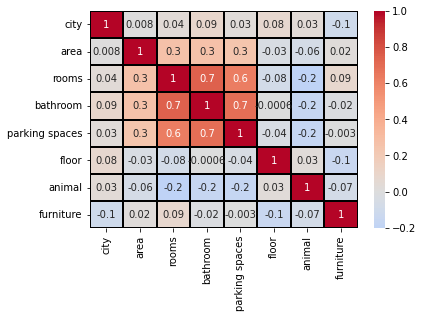

In [13]:
import seaborn as sns
sns.heatmap(X.corr(),fmt='.1g',
            annot=True,
            center=0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black'
)

#there is high correlation among our predictors, which is not good (which means that some predictors can represent others
# without having all of them there.)

#Standardizing data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [15]:
X_scaled= pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head() #note that MinMaxScaler reduce everything to between 0 and 1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,1.0,0.009351,0.222222,0.222222,0.333333,0.000000,0.0,0.0
1,0.0,0.002195,0.111111,0.000000,0.083333,0.101010,0.0,1.0
2,1.0,0.017604,0.444444,0.444444,0.333333,0.030303,0.0,0.0
3,1.0,0.002561,0.111111,0.111111,0.083333,0.121212,0.0,1.0
4,1.0,0.000366,0.000000,0.000000,0.000000,0.000000,1.0,1.0


#Principal Component Analysis

In [16]:
model= PCA(random_state=959).fit(X_scaled)

Text(0, 0.5, 'Explained variance')

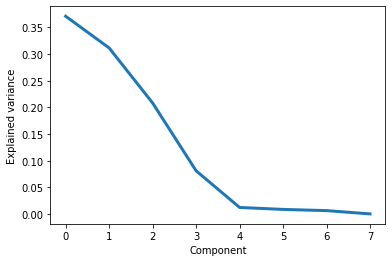

In [17]:
plt.plot(model.explained_variance_ratio_, linewidth=3)
plt.xlabel('Component')
plt.ylabel('Explained variance')
#this graphs looks into the marginal variance that each varible brings.

Text(0, 0.5, 'Explained variance cummulative')

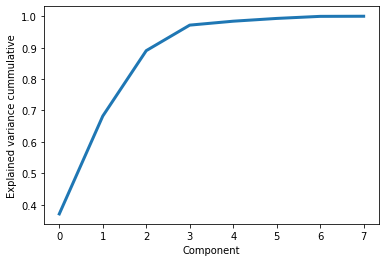

In [18]:
#cummulative variance
plt.plot(np.cumsum(model.explained_variance_ratio_), linewidth=3)
plt.xlabel('Component')
plt.ylabel('Explained variance cummulative')

In [19]:
#PCA
pca_model= PCA(n_components=4,  random_state=59).fit(X_scaled)
pca_model.components_


array([[ 0.18141785, -0.00189399, -0.05284029, -0.02601622, -0.02843018,
         0.02050117,  0.51375045, -0.83573138],
       [-0.08769269, -0.00233231, -0.05560262, -0.07943251, -0.06419491,
        -0.00852144,  0.84768857,  0.5100332 ],
       [-0.97633077, -0.00129424, -0.03821757, -0.0629053 , -0.0285704 ,
        -0.00666563,  0.00931613, -0.20102586],
       [-0.07588276,  0.02061973,  0.48755505,  0.68530552,  0.51873277,
        -0.01177788,  0.13116733, -0.00598159]])

In [20]:
model_interpretation=pd.DataFrame(pca_model.components_, columns=X_scaled.columns)

In [21]:
model_interpretation

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,0.181418,-0.001894,-0.052840,-0.026016,-0.028430,0.020501,0.513750,-0.835731
1,-0.087693,-0.002332,-0.055603,-0.079433,-0.064195,-0.008521,0.847689,0.510033
2,-0.976331,-0.001294,-0.038218,-0.062905,-0.028570,-0.006666,0.009316,-0.201026
3,-0.075883,0.020620,0.487555,0.685306,0.518733,-0.011778,0.131167,-0.005982


In [22]:
#the model above has 4 components. In the first component, city is the only one with high value.
#component zero has more of "city living characteristics"- high number of floors, low parking space,low bathroom etc

In [23]:
#transforming component
components= pca_model.transform(X_scaled)
components

array([[ 0.51221173, -0.60692178,  0.00138902,  0.13891056],
       [-0.48409306,  0.02983851,  0.80139784, -0.1286716 ],
       [ 0.49529367, -0.63720706, -0.0212954 ,  0.39935952],
       ...,
       [-0.47523025,  0.04110945,  0.80782396, -0.22644243],
       [ 0.19786601,  0.77033256, -0.1785653 ,  0.10142872],
       [ 0.53181399, -0.56737054,  0.02649712, -0.19786231]])

In [24]:
components= pd.DataFrame(components, columns=['city_xtristics', 'accepts_ani_furn','none_city_xter', 'exotic_houses'])
#naming the columns based on some of the observed characteristics from the data
#as a guide in naming the columns, we start by looking at the extremes-the columns with highest values.
#for the second componnent, the characteristic of accepting animal and furniture are the highest.
components.head()

,city_xtristics,accepts_ani_furn,none_city_xter,exotic_houses
0,0.512212,-0.606922,0.001389,0.138911
1,-0.484093,0.029839,0.801398,-0.128672
2,0.495294,-0.637207,-0.021295,0.399360
3,-0.305152,-0.066853,-0.182058,-0.128640
4,0.217248,0.802227,-0.158314,-0.169636


In [28]:
#merging data
final_dataset= pd.concat([data, components], axis=1)
final_dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount,city_xtristics,accepts_ani_furn,none_city_xter,exotic_houses
0,1,240,3,3,4,0,0,0,8000,0.512212,-0.606922,0.001389,0.138911
1,0,64,2,1,1,10,0,1,820,-0.484093,0.029839,0.801398,-0.128672
2,1,443,5,5,4,3,0,0,7000,0.495294,-0.637207,-0.021295,0.399360
3,1,73,2,2,1,12,0,1,1250,-0.305152,-0.066853,-0.182058,-0.128640
4,1,19,1,1,0,0,1,1,1200,0.217248,0.802227,-0.158314,-0.169636
